<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Independent_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Independent Component Analysis

First, let’s load the packages we’ll need. The main functionality we want is the FastICA method available from sklearn.decomposition. We’ll also load the skimage package, which we’ll use to read in a sample image, and pylab which will show the image to the screen

In [0]:
# load packages
from sklearn.decomposition import FastICA
from pylab import *
from skimage import data, io, color

Next, we read in the image. We will set the parameter, as_grey, equal to True. This will make every pixel in the image a value between 0 and 255, rather than a 3-dimensional RGB value.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


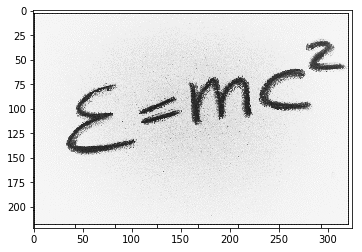

In [33]:
emc2_image = io.imread("emc2.png", as_grey = True)

import matplotlib.pyplot as plt
plt.imshow(emc2_image, cmap='gray')

Now, we choose a number of components we want, and use that number to create a FastICA object. In the sample below, we’ll create a FastICA object with 10 components. This will allow us to run ICA on our image, resulting in 10 independent components.

In [0]:
ica = FastICA(n_components = 5)

Then, we use our object, ica, to run the ICA algorithm on the image.

In [31]:
# run ICA on image
ica.fit(emc2_image)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
        n_components=5, random_state=None, tol=0.0001, w_init=None,
        whiten=True)

An important test when doing any type of dimensionality reduction to test how much information has been lost. In our example, we will reconstruct the image with the independent components — i.e. how does the image look if we only know the 10 independent components we’ve developed?

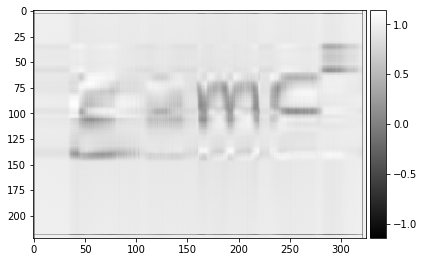

In [32]:
# reconstruct image with independent components
emc2_image_ica = ica.fit_transform(emc2_image)
emc2_restored = ica.inverse_transform(emc2_image_ica)
 
# show image to screen
io.imshow(emc2_restored, cmap='gray')
show()

As you can see, using just 10 independent components still shows a very recognizable version of our original picture. What happens if we change the number of components?